# Project Benson

## Aim

- High Gala Participation Rate

## How?

- Identifying High Traffic Volumes at Subway Entrances/Exits
 - By Day of Week
 - By Hour of Day


- Identifying Target Audience (assumptions on those more likely to be interested)
 - Identifying Stations with High Volumes of Non-Tourist Traffic (locals)
     - By comparing station's weekend vs weekday traffic

 - [Demographic & Geographic Profiles](https://datausa.io/profile/geo/new-york-ny)
     - Assume areas with more females more interested?
     - Assume areas with higher income more likely to donate?
     - Assume areas with younger demographics more interested?
     - Assume areas with higher education level more interested?
     - Assume areas with high employment in tech industry more interested?
  

## Demographics - sex, income
#### Based on county

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
nycpop = pd.read_csv('nyc_census_tracts.csv')
print(nycpop.head())

   CensusTract County Borough  TotalPop   Men  Women  Hispanic  White  Black  \
0  36005000100  Bronx   Bronx      7703  7133    570      29.9    6.1   60.9   
1  36005000200  Bronx   Bronx      5403  2659   2744      75.8    2.3   16.0   
2  36005000400  Bronx   Bronx      5915  2896   3019      62.7    3.6   30.7   
3  36005001600  Bronx   Bronx      5879  2558   3321      65.1    1.6   32.4   
4  36005001900  Bronx   Bronx      2591  1206   1385      55.4    9.0   29.0   

   Native      ...       Construction  Production Drive  Carpool  Transit  \
0     0.2      ...                NaN         NaN   NaN      NaN      NaN   
1     0.0      ...                8.0        22.3  44.8     13.7     38.6   
2     0.0      ...                9.0        10.5  41.3     10.0     44.6   
3     0.0      ...                4.9        13.8  37.2      5.3     45.5   
4     0.0      ...                6.6        11.0  19.2      5.3     63.9   

   Walk  OtherTransp  WorkAtHome  MeanCommute  Unemploym

Dataset from: https://www.kaggle.com/muonneutrino/new-york-city-census-data/downloads/nyc_census_tracts.csv/1

In [2]:
#sum of men & women per county
nycpop.groupby('County')['Men','Women'].sum()

,Men,Women
County,,
Bronx,672447,755910
Kings,1229001,1366258
New York,769434,860073
Queens,1115459,1185680
Richmond,228703,243778


In [24]:
#select columns to use for graph
nycpop_gender = nycpop[["County","Men","Women"]]
nycpop_gender.head()

,County,Men,Women
0,Bronx,7133,570
1,Bronx,2659,2744
2,Bronx,2896,3019
3,Bronx,2558,3321
4,Bronx,1206,1385


In [49]:
nycpop_gender_melted = pd.melt(nycpop_gender, id_vars="County",var_name="Gender",value_name="Count_person")
print(nycpop_gender_melted)

        County Gender  Count_person
0        Bronx    Men          7133
1        Bronx    Men          2659
2        Bronx    Men          2896
3        Bronx    Men          2558
4        Bronx    Men          1206
5        Bronx    Men          3301
6        Bronx    Men          2130
7        Bronx    Men           109
8        Bronx    Men          2338
9        Bronx    Men          1375
10       Bronx    Men          2427
11       Bronx    Men          2292
12       Bronx    Men           769
13       Bronx    Men          1824
14       Bronx    Men          1921
15       Bronx    Men           128
16       Bronx    Men           542
17       Bronx    Men          3520
18       Bronx    Men           675
19       Bronx    Men          3125
20       Bronx    Men          3147
21       Bronx    Men          3094
22       Bronx    Men          2081
23       Bronx    Men           845
24       Bronx    Men          2154
25       Bronx    Men          2313
26       Bronx    Men       

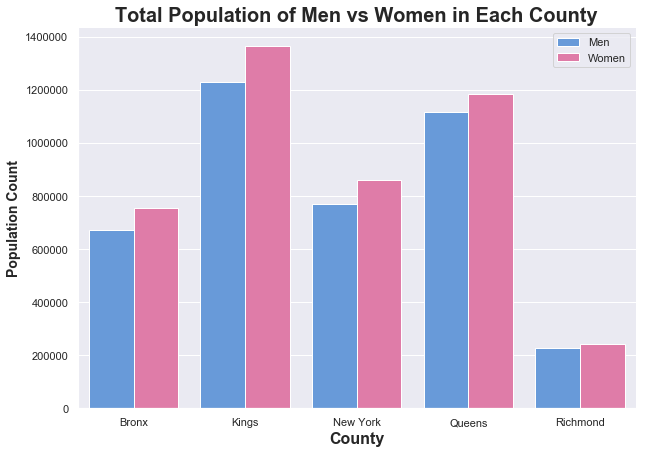

In [108]:
#graph for Men vs Women
sns.set(rc={'figure.figsize':(10,7)})
my_colour = {"Men": "#5598ec", "Women": "#ef6ca6"}

sns.barplot(x="County",y="Count_person", hue="Gender", ci=None, palette=my_colour,
            data=nycpop_gender_melted, estimator=sum);
sns.despine()
plt.legend(loc='upper right')

plt.title('Total Population of Men vs Women in Each County', fontsize=20, fontweight='bold')
plt.xlabel('County', fontsize=16, fontweight='bold')
plt.ylabel('Population Count', fontsize=14, fontweight='bold')

plt.savefig('Gender barplot.svg')

In [55]:
#sns.barplot(x="County",y="Women", ci=None, palette=sns.color_palette("husl", 1), data=nycpop);

In [6]:
#average income per capita in each county
nycpop.groupby('County')['IncomePerCap'].mean().sort_values(ascending=False)

County
New York    69351.519573
Richmond    32022.444444
Kings       27866.530667
Queens      27596.498452
Bronx       19481.574405
Name: IncomePerCap, dtype: float64

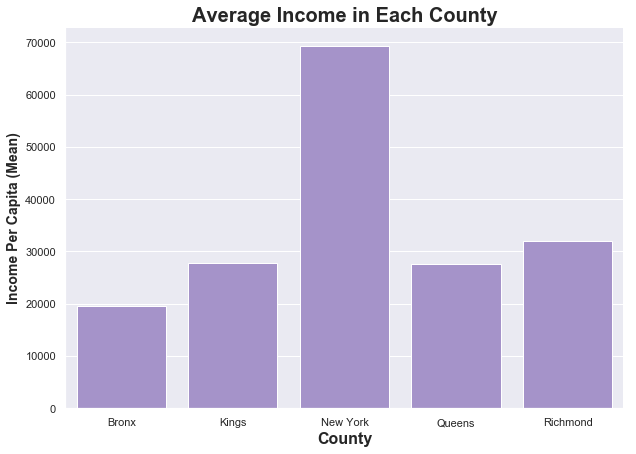

In [109]:
#graph for average income
sns.barplot(x="County",y="IncomePerCap", ci=None, color='#a28ad2', data=nycpop)
sns.despine()

plt.title('Average Income in Each County', fontsize=20, fontweight='bold')
plt.xlabel('County', fontsize=16, fontweight='bold')
plt.ylabel('Income Per Capita (Mean)', fontsize=14, fontweight='bold')

plt.savefig('Income barplot.svg')

In [107]:
#number of professional
nycpop.groupby('County')['Professional','Service','Office','Construction','Production'].sum().sort_values(by=['Professional'],ascending=False)

,Professional,Service,Office,Construction,Production
County,,,,,
Kings,27916.1,18185.2,17393.6,4872.7,6635.3
Queens,21088.7,15807.7,15843.0,5324.2,6936.4
New York,16313.1,4165.4,5841.3,585.6,1195.5
Bronx,8188.3,11112.5,8099.0,2371.7,3728.0
Richmond,4121.0,2197.3,2591.2,935.5,954.0
